/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


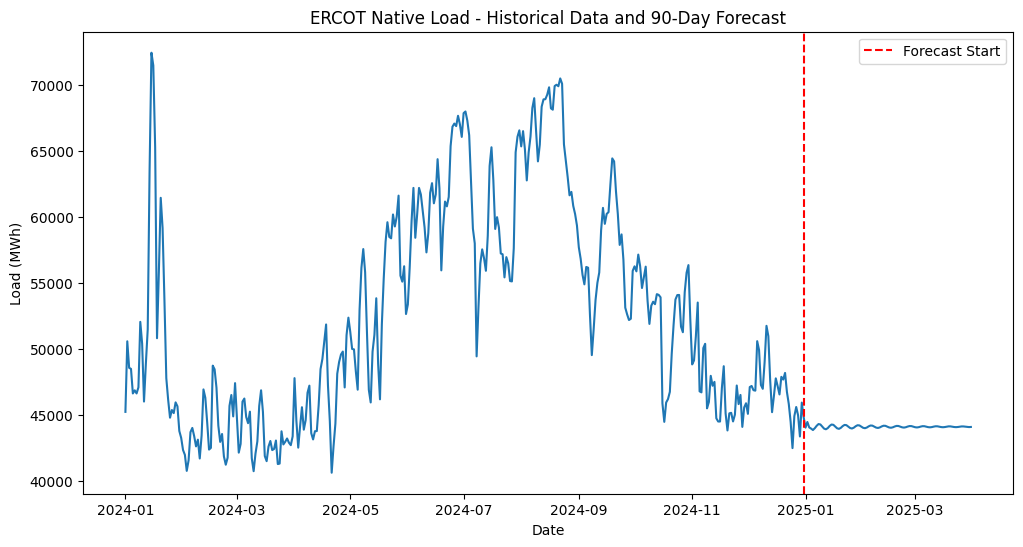

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import os

# Get current working directory
path = os.getcwd()
# Load the dataset
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

df['Hour Ending'] = df['Hour Ending'].str.replace(' 24:00', ' 00:00')
df['Hour Ending'] = df['Hour Ending'].str.replace(' DST', '')
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df.set_index('Hour Ending', inplace=True)

ercot_daily = df['ERCOT'].resample('D').mean()

model = ARIMA(ercot_daily, order=(3, 1, 3))

results = model.fit()

forecast = results.forecast(steps=90)

future_dates = [ercot_daily.index[-1] + DateOffset(days=x) for x in range(1,91)]
forecast_series = pd.Series(forecast, index=future_dates)

# Combine historical data and forecast
full_series = pd.concat([ercot_daily, forecast_series])

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(full_series.index, full_series.values)
plt.title('ERCOT Native Load - Historical Data and 90-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MWh)')
plt.axvline(x=ercot_daily.index[-1], color='r', linestyle='--', label='Forecast Start')
plt.legend()
plt.show()
